In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style="white",color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics


In [2]:
df_train = pd.read_csv("train.csv")
df_train.shape

(891, 11)

In [4]:
df_train.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [5]:
df_train.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [7]:
df_train.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [10]:
df_train.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [11]:
df_train.shape

(891, 11)

In [15]:
df_train = df_train.drop(["name","ticket","cabin"],axis=1)
df_train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
def age_approx(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass ==2:
            return 29
        else:
            return 24
    else:
        return age
                

In [17]:
df_train.groupby(["pclass"]).mean()

,survived,age,sibsp,parch,fare
pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [18]:
df_train["age"] = df_train[["age","pclass"]].apply(age_approx,axis=1)

In [19]:
df_train.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
dtype: int64

In [23]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [24]:
df_train_dummied =pd.get_dummies(df_train,columns=["sex"])

In [25]:
df_train_dummied =pd.get_dummies(df_train_dummied,columns=["embarked"])

In [26]:
df_train_dummied.head()

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


<AxesSubplot:>

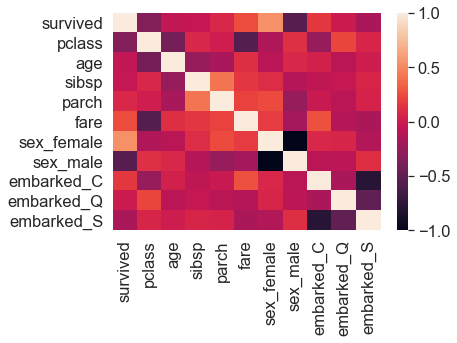

In [27]:
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummied.corr())

There is a strong correleation among survived and sex_female

# Now let's us bulid a classifier which can predict survival creating train and test data sets using accent y variables

In [29]:
used_features =["pclass","age","sibsp","parch","sex_female","sex_male","embarked_C","embarked_Q","embarked_S"]

x = df_train_dummied[used_features].values
y = df_train_dummied["survived"]

In [30]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=1)

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


# Creating the model

In [33]:
LogReg =LogisticRegression()

In [34]:
LogReg.fit(x_train,y_train)

LogisticRegression()

# Storing the prediction given by the classifier in the y_pred variable

In [35]:
y_pred =LogReg.predict(x_test)

In [36]:
metrics.confusion_matrix(y_test,y_pred)

array([[143,  23],
       [ 22,  79]], dtype=int64)

In [37]:
metrics.accuracy_score(y_test,y_pred)

0.8314606741573034

In [38]:
len(x_test)

267

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [40]:
LogReg.coef_

array([[-1.0416583 , -0.03986563, -0.2418657 , -0.0405489 ,  1.19684229,
        -1.191862  ,  0.35142572, -0.03561634, -0.3108291 ]])

In [41]:
LogReg.intercept_

array([3.6503613])

In [42]:
df_train_dummied[used_features].columns

Index(['pclass', 'age', 'sibsp', 'parch', 'sex_female', 'sex_male',
       'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')

In [43]:
LogReg.predict_proba(x_test)

array([[0.26543762, 0.73456238],
       [0.39670167, 0.60329833],
       [0.94739252, 0.05260748],
       [0.25946287, 0.74053713],
       [0.94405682, 0.05594318],
       [0.13498849, 0.86501151],
       [0.33318424, 0.66681576],
       [0.51891172, 0.48108828],
       [0.78162823, 0.21837177],
       [0.40735921, 0.59264079],
       [0.74014692, 0.25985308],
       [0.21156393, 0.78843607],
       [0.74871108, 0.25128892],
       [0.14562753, 0.85437247],
       [0.86463688, 0.13536312],
       [0.36950158, 0.63049842],
       [0.89368398, 0.10631602],
       [0.29766694, 0.70233306],
       [0.17634635, 0.82365365],
       [0.39887297, 0.60112703],
       [0.90490942, 0.09509058],
       [0.55285824, 0.44714176],
       [0.86434636, 0.13565364],
       [0.93739461, 0.06260539],
       [0.51638224, 0.48361776],
       [0.51590185, 0.48409815],
       [0.03915836, 0.96084164],
       [0.8692353 , 0.1307647 ],
       [0.89806853, 0.10193147],
       [0.32523047, 0.67476953],
       [0.